# Phishing Classifier

Life cycle of Machine learning Project
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

### Problem Statement
Phishing is a type of fraud in which an attacker impersonates a reputable company or person in order to get sensitive information such as login credentials or account information via email or other communication channels. Phishing is popular among attackers because it is easier to persuade someone to click a malicious link that appears to be authentic than it is to break through a computer's protection measures. The mail goal is to predict whether the domains are real or malicious.

### Data Collection
Paper Link: - https://www.sciencedirect.com/science/article/pii/S2352340920313202

Dataset Link: - https://data.mendeley.com/datasets/72ptz43s9v/1

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [39]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns

pd.pandas.set_option("display.max_column",None)

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [3]:
df = pd.read_csv("D:\\pythonProject\\Phishing Classifier\\DATA\\Training_Batch_file\\phising_08012020_120000.csv")

In [4]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1


In [6]:
df.shape

(11055, 31)

### 2.2 Dataset Description
The dataset consists of different columns with information regarding whether a website is a phising website or not.

The columns are :

1.having_IP_Address [-1 1]
2.URL_Length [ 1 0 -1]
3.Shortining_Service [ 1 -1]
4. having_At_Symbol [ 1 -1]
5. double_slash_redirecting [-1 1]
6. Prefix_Suffix [-1 1]
7. having_Sub_Domain [-1 0 1]
8. SSLfinal_State [-1 1 0]
9. Domain_registeration_length [-1 1]
10. Favicon [ 1 -1]
11. port [ 1 -1]
12. HTTPS_token [-1 1]
13. Request_URL [ 1 -1]
14. URL_of_Anchor [-1 0 1]
15. Links_in_tags [ 1 -1 0]
16. SFH [-1 1 0]
17. Submitting_to_email [-1 1]
18. Abnormal_URL [-1 1]
19. Redirect [0 1]
20. on_mouseover [ 1 -1]
21. RightClick [ 1 -1]
22. popUpWidnow [ 1 -1]
23. Iframe [ 1 -1]
24. age_of_domain [-1 1]
25. DNSRecord [-1 1]
26. web_traffic [-1 0 1]
27. Page_Rank [-1 1]
28. Google_Index [ 1 -1]
29. Links_pointing_to_page [ 1 0 -1]
30. Statistical_report [-1 1]
31. Result [-1 1]

### 3. Data Checks to perform
1. Check Missing values
2. Check Duplicates
3. Check data type


### 3.1 Check Missing values

In [8]:
df.isnull().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

There is no missing value

***

### 3.2 Check Duplicates

In [13]:
df.duplicated().sum()

5206

In [18]:
df.loc[df.duplicated(keep = False)]

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11047,-1,-1,1,1,1,-1,1,-1,-1,1,1,-1,1,-1,-1,-1,-1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11050,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1


In [19]:
df.drop_duplicates(keep = False,inplace=True)

In [20]:
df.duplicated().sum()

0

There were 5206 duplicate values in the dataframe. Having duplicate rows in the dataset can lead to inaccurate results in your analysis and may cause bias in your conclusions. Therefore, it is important to identify and handle duplicate rows appropriately.

********

### 3.3 Check data type

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3212 entries, 91 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            3212 non-null   int64
 1   URL_Length                   3212 non-null   int64
 2   Shortining_Service           3212 non-null   int64
 3   having_At_Symbol             3212 non-null   int64
 4   double_slash_redirecting     3212 non-null   int64
 5   Prefix_Suffix                3212 non-null   int64
 6   having_Sub_Domain            3212 non-null   int64
 7   SSLfinal_State               3212 non-null   int64
 8   Domain_registeration_length  3212 non-null   int64
 9   Favicon                      3212 non-null   int64
 10  port                         3212 non-null   int64
 11  HTTPS_token                  3212 non-null   int64
 12  Request_URL                  3212 non-null   int64
 13  URL_of_Anchor                3212 non-null   i

****
### 3.4 Statistical Check

In [46]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000,3212.000000
mean,-0.080946,-0.606476,0.714819,0.443960,0.704857,-0.803238,0.057908,0.013387,-0.273350,0.550436,0.628892,0.648817,0.046700,-0.231943,-0.191781,-0.593711,0.528643,0.664384,0.151619,0.688045,0.889788,0.528020,0.754047,-0.012453,0.648817,0.179016,-0.353674,0.625156,0.343711,0.689913,-0.230386
std,0.996874,0.781399,0.699418,0.896186,0.709460,0.595751,0.775527,0.920784,0.962064,0.835007,0.777614,0.761063,0.999064,0.731930,0.767176,0.731630,0.848977,0.747508,0.358707,0.725781,0.456445,0.849364,0.656922,1.000078,0.761063,0.821326,0.935514,0.780622,0.574704,0.724005,0.973251
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*****
### Exploring Data (Visualization)

In [27]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
91,-1,-1,-1,1,-1,1,1,1,1,1,1,-1,-1,1,0,-1,-1,-1,0,1,1,1,1,1,1,1,1,1,1,-1,1
107,1,-1,1,1,1,-1,1,-1,-1,1,1,1,-1,-1,0,-1,-1,1,0,1,1,1,1,-1,1,-1,-1,1,0,1,-1
129,1,-1,1,1,-1,-1,-1,1,-1,1,1,1,-1,0,-1,-1,1,1,1,1,1,1,1,-1,-1,1,-1,1,0,1,-1
132,1,-1,1,1,-1,-1,1,-1,-1,1,1,1,1,0,0,-1,-1,1,1,1,1,1,1,-1,-1,0,-1,1,0,1,-1
168,1,-1,1,1,1,-1,-1,1,1,1,1,1,-1,-1,-1,-1,1,1,0,1,1,1,1,-1,1,0,-1,-1,1,1,-1


***
#### CountPlot

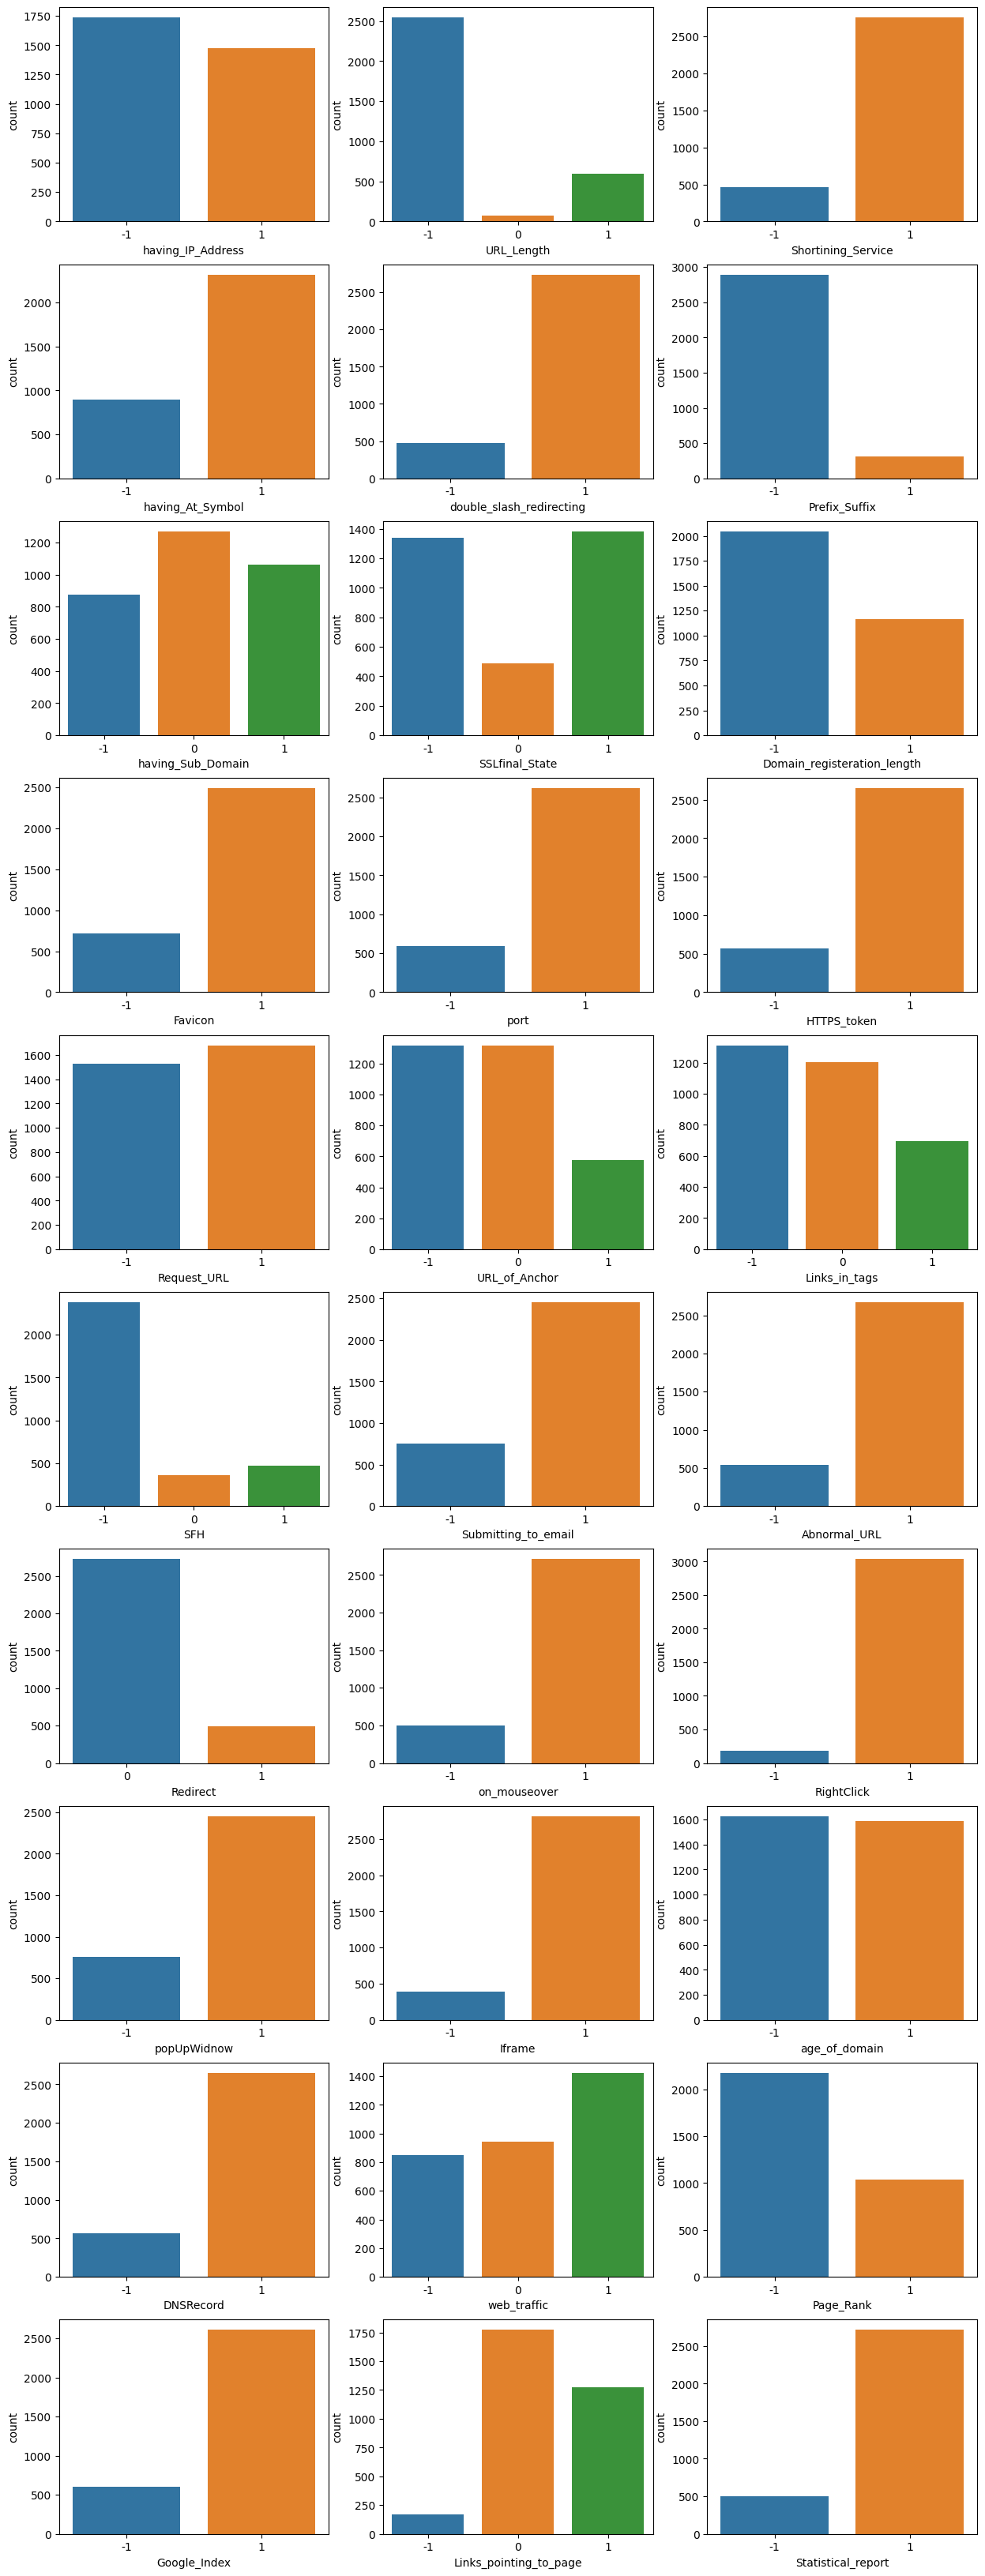

In [44]:
plot.figure(figsize=(15,50), facecolor='white')
plotnumber =1

for column in df.drop(['Result'],axis=1):
    ax = plot.subplot(12,3,plotnumber)
    sns.countplot(x=column, data=df, ax=ax)
    plot.xlabel(column,fontsize=10)
    plotnumber+=1
plot.show()

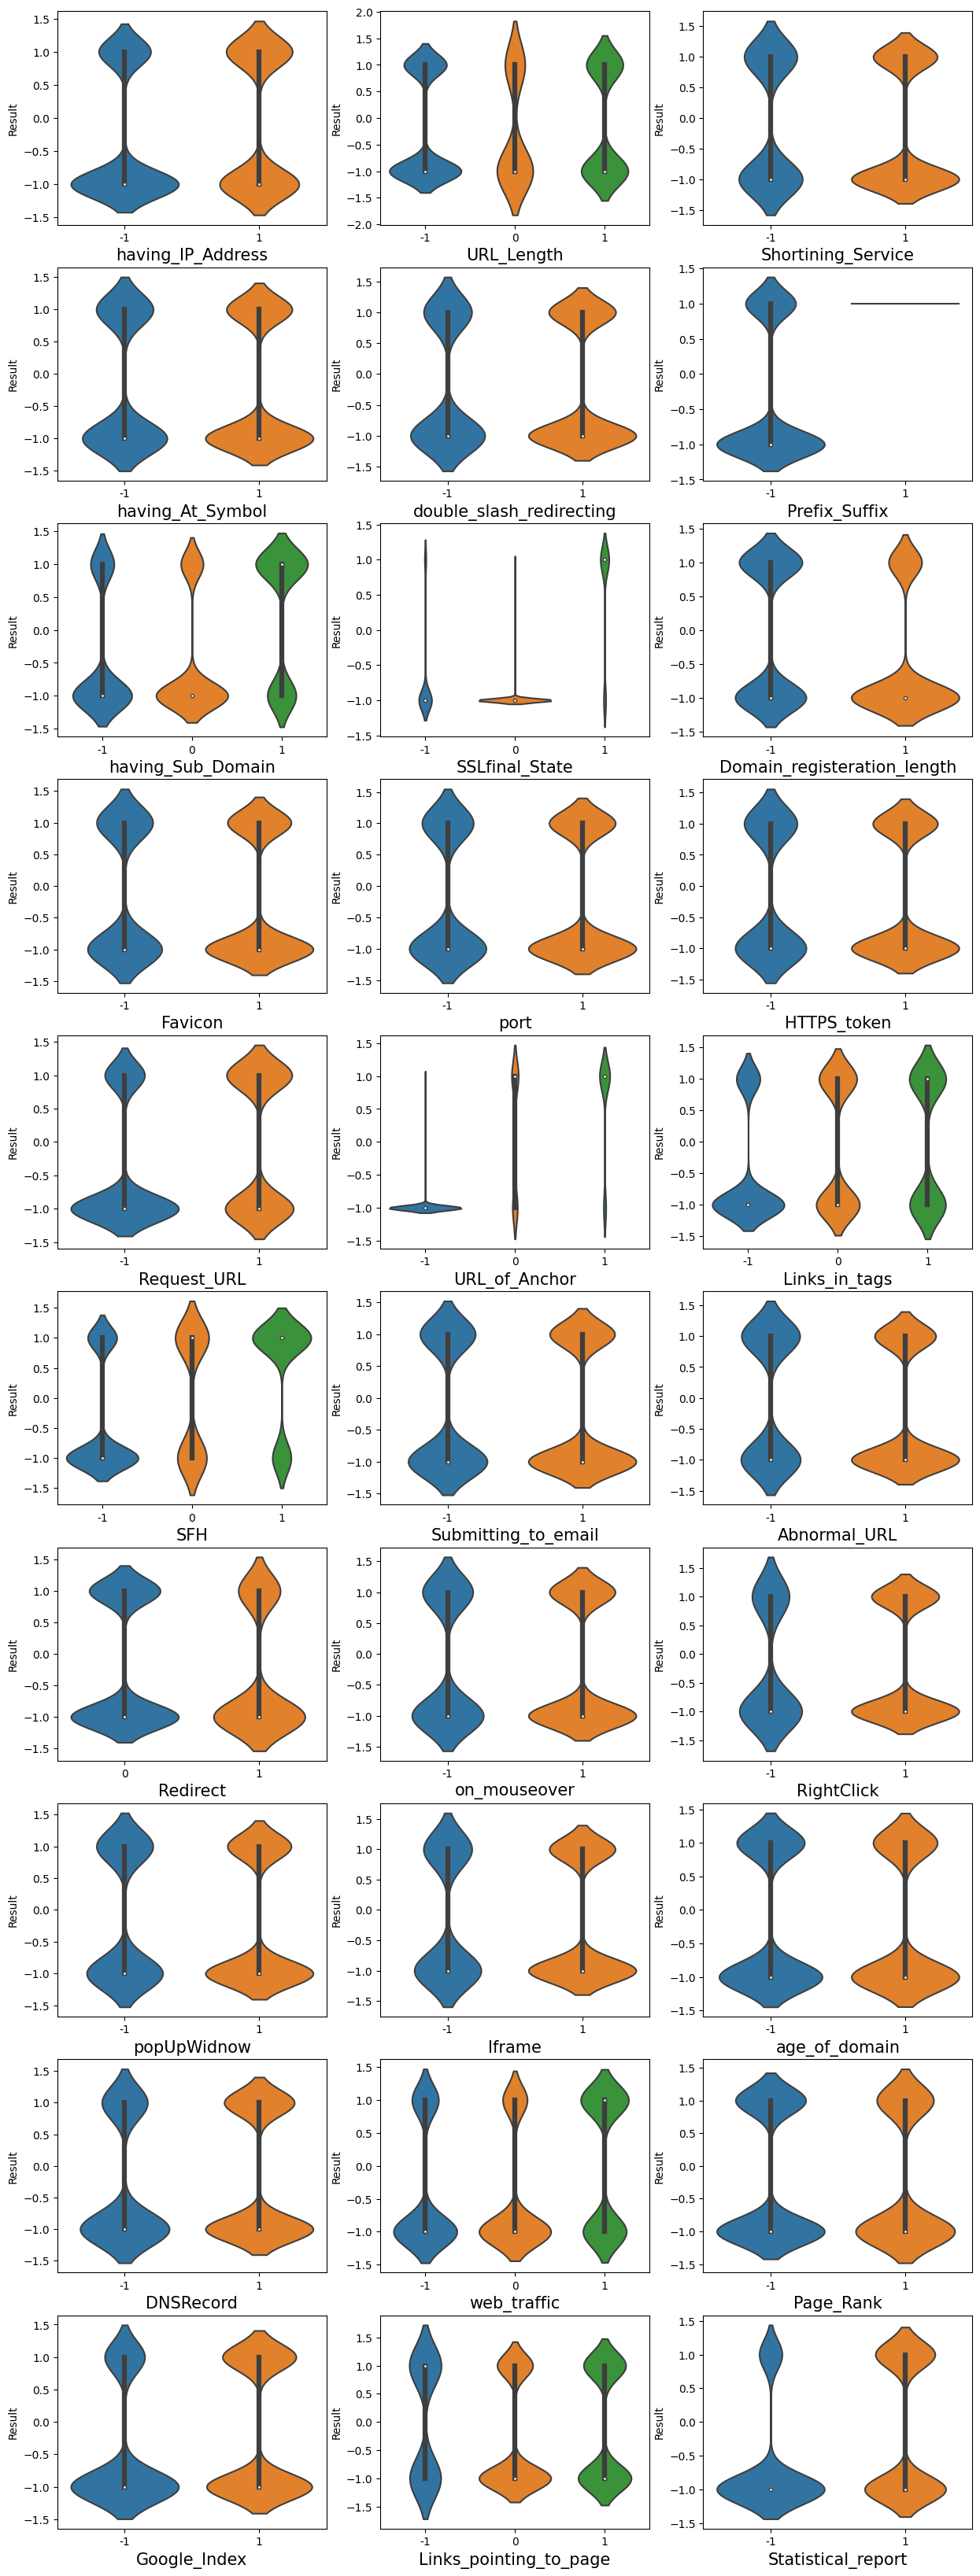

In [56]:
plot.figure(figsize=(15,50),facecolor='white')
plotnumber= 1

for column in df.drop(["Result"],axis = 1):
    ax = plot.subplot(12,3,plotnumber)
    sns.violinplot(data = df, x = df[column],y = df["Result"])
    plot.xlabel(column,fontsize = 15)
    plotnumber+=1
    
plot.show()


The data is already distributed
****